# Analysis of Coffee Shop Sales

In this analysis we have a dataset, `coffee_shop_sales.csv`, which provides information from various coffee shops in NYC and the transactions that occured at those coffee shops. The purpose of this analysis is to conduct an evaluation of the data to answer the following questions:

1. Does the location of the coffee shop have an impact on the number of transactions?
2. Does the time of day have an impact on the number of transactions?
3. What is the most sold product?
4. What is the least sold product?
5. Do coffee shops sell more coffee in the winter months?

## Introduction

For this analysis we will import the necessary libraries such as `pandas`, `numpy`, `seaborn`, and `matplotlib` to be able to adequately analyze the trends and data. After import the libraries the next step will be to load the coffee shop sales data and save it as a **dataframe**.

In [13]:
# import ncecessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# load coffee shope sales data
df = pd.read_csv('coffee_shop_sales.csv')

# display first 5 rows
print(df.head())

   transaction_id transaction_date transaction_time  transaction_qty  \
0               1         1/1/2023          7:06:11                2   
1               2         1/1/2023          7:08:56                2   
2               3         1/1/2023          7:14:04                2   
3               4         1/1/2023          7:20:24                1   
4               5         1/1/2023          7:22:41                2   

   store_id   store_location  product_id  unit_price    product_category  \
0         5  Lower Manhattan          32         3.0              Coffee   
1         5  Lower Manhattan          57         3.1                 Tea   
2         5  Lower Manhattan          59         4.5  Drinking Chocolate   
3         5  Lower Manhattan          22         2.0              Coffee   
4         5  Lower Manhattan          57         3.1                 Tea   

            product_type               product_detail Revenue  Month Month.1  \
0  Gourmet brewed coffee      

In review the first 5 rows I can see that there are 17 columns and it looks like it is a mix of integers and objects.  In this initial look there doesn't appear to be any missing or abnormal data.  However given the large amount of data a closer inspection will be required.

The next step in cleaning and wrangling the data will be to check for missing values.  To do this I will use the `.isna()` method to check if there is any missing or NaN values.

In [4]:
# check for missing values
df.isna().sum()

transaction_id      0
transaction_date    0
transaction_time    0
transaction_qty     0
store_id            0
store_location      0
product_id          0
unit_price          0
product_category    0
product_type        0
product_detail      0
Revenue             0
Month               0
Month.1             0
Weekday             0
Weekday.1           0
Hour                0
dtype: int64

The results are good, showing that there are no missing values.  Next I checked the types of the columns to see check to make sure all the values were assigned the correct types.

In [5]:
# check for column types
df.dtypes

transaction_id        int64
transaction_date     object
transaction_time     object
transaction_qty       int64
store_id              int64
store_location       object
product_id            int64
unit_price          float64
product_category     object
product_type         object
product_detail       object
Revenue              object
Month                 int64
Month.1              object
Weekday               int64
Weekday.1            object
Hour                  int64
dtype: object

In reviewing the results of the type check, I did not find any abnormal assignments.

I wanted to check to see what the basic information of the dataframe looks like.

In [8]:
# Review basic information about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149116 entries, 0 to 149115
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   transaction_id    149116 non-null  int64  
 1   transaction_date  149116 non-null  object 
 2   transaction_time  149116 non-null  object 
 3   transaction_qty   149116 non-null  int64  
 4   store_id          149116 non-null  int64  
 5   store_location    149116 non-null  object 
 6   product_id        149116 non-null  int64  
 7   unit_price        149116 non-null  float64
 8   product_category  149116 non-null  object 
 9   product_type      149116 non-null  object 
 10  product_detail    149116 non-null  object 
 11  Revenue           149116 non-null  object 
 12  Month             149116 non-null  int64  
 13  Month.1           149116 non-null  object 
 14  Weekday           149116 non-null  int64  
 15  Weekday.1         149116 non-null  object 
 16  Hour              14

Looking at this there is another good sign that all columns have the same amount of entries and that it matches the number of entries.  There are a total of **149116** entries in this dataframe.

## Analysis

Now that the data is checked over and appears to be clean, I want to move into analyzing the information and determining the answers to the questions at the beginning of the analysis.  

To begin with I want to get a sense of the summary statistics to see if there is anything that is immediately apparent in the data.  Then I want to look at what the highest selling product and the lowest selling product is across all store locations.

In [9]:
# find summary statistics
df.describe()

,transaction_id,transaction_qty,store_id,product_id,unit_price,Month,Weekday,Hour
count,149116.000000,149116.000000,149116.000000,149116.000000,149116.000000,149116.000000,149116.000000,149116.000000
mean,74737.371872,1.438276,5.342063,47.918607,3.382219,3.988881,3.982336,11.735790
std,43153.600016,0.542509,2.074241,17.930020,2.658723,1.673091,1.996650,3.764662
min,1.000000,1.000000,3.000000,1.000000,0.800000,1.000000,1.000000,6.000000
25%,37335.750000,1.000000,3.000000,33.000000,2.500000,3.000000,2.000000,9.000000
50%,74727.500000,1.000000,5.000000,47.000000,3.000000,4.000000,4.000000,11.000000
75%,112094.250000,2.000000,8.000000,60.000000,3.750000,5.000000,6.000000,15.000000
max,149456.000000,8.000000,8.000000,87.000000,45.000000,6.000000,7.000000,20.000000


There are a couple of things that make sense and standout right away.  I have broken them down by column below.<br>

*Transaction Quantitiy*
- The **average transaction quantity** is between 1 to 2 items.
- The **maximum quantity** is 8 items.
- The **IQR** is 1 item.

*Hour*
- The **earliest time** that sales are made is at 6 am.
- The **latest time** is at 8 pm.
- **Most of the sales** are made between 9 am and 3 pm.


In [109]:
highest_selling_product = df.groupby('product_type')['transaction_qty'].sum().idxmax()
print('The highest selling product is: ', highest_selling_product)

The highest selling product is:  Brewed Chai tea


The highest selling product is **Brewed Chai Tea** across all of the store locations.  This will be analyzed in more detail later.

In [12]:
lowest_selling_product = df.groupby('product_type')['transaction_qty'].sum().idxmin()
print(lowest_selling_product)

Green beans


The lowest selling product is **Green Coffee Beans**.

The next analysis will be a comparison of total sales made for each store location.

The total transactions for each store location are as follows:      store_location  transaction_qty
0          Astoria            70991
1   Hell's Kitchen            71737
2  Lower Manhattan            71742


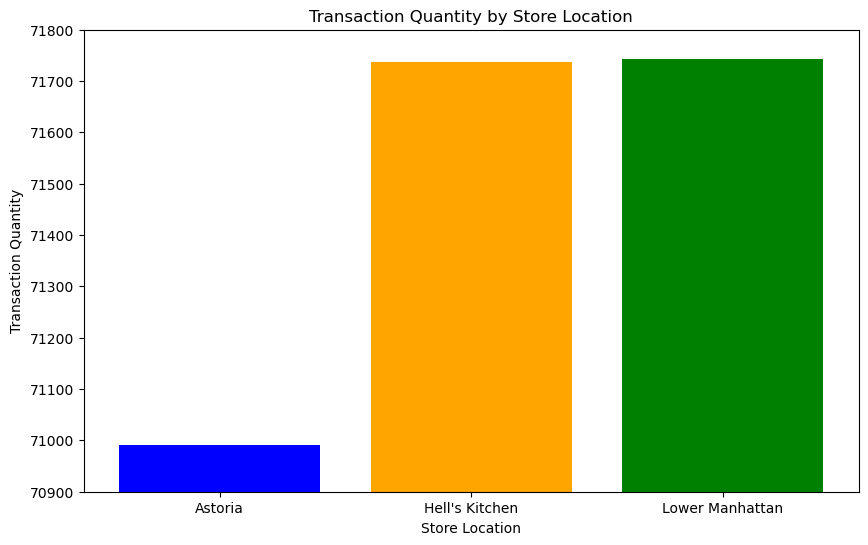

<Figure size 640x480 with 0 Axes>

In [84]:
# group by store location and the sum of the transaction qty
grouped_data = df.groupby('store_location')['transaction_qty'].sum().reset_index()

#print the grouped data
print('The total transactions for each store location are as follows: ', grouped_data)

# plot the data in a bar chart
plt.figure(figsize = (10, 6))
plt.bar(grouped_data['store_location'], grouped_data['transaction_qty'], color = ['blue', 'orange', 'green'])
plt.ylim(70900, 71800)
plt.xlabel('Store Location')
plt.ylabel('Transaction Quantity')
plt.title('Transaction Quantity by Store Location')
plt.show()
plt.clf()

In the evaluation I determined that there are three (3) store locations: **Astoria**, **Hell's Kitchen**, and **Lower Manhattan**.  The breakdown for the sales is as follows:

1. Lower Manhattan with **71742** total sales.
2. Hell's Kitchen with **71737** total sales.
3. Astoria with **70991** total sales.

This point would be a good one for further analysis to check if there is correlation between total sales for each location and what is located near each location.  Is there possible a proximity relationship which is causing Lower Manhattan and Hell's Kitchen to be so far above Astoria?

The next evaluation is to determine if there is a correlation between time of day and sales.

Store: Astoria
 Maximum transactions: 7388.0 at hour 10
 Minimum transactions: 0.0 at hour 6
Store: Hell's Kitchen
 Maximum transactions: 9873.0 at hour 10
 Minimum transactions: 778.0 at hour 20
Store: Lower Manhattan
 Maximum transactions: 9452.0 at hour 10
 Minimum transactions: 102.0 at hour 20


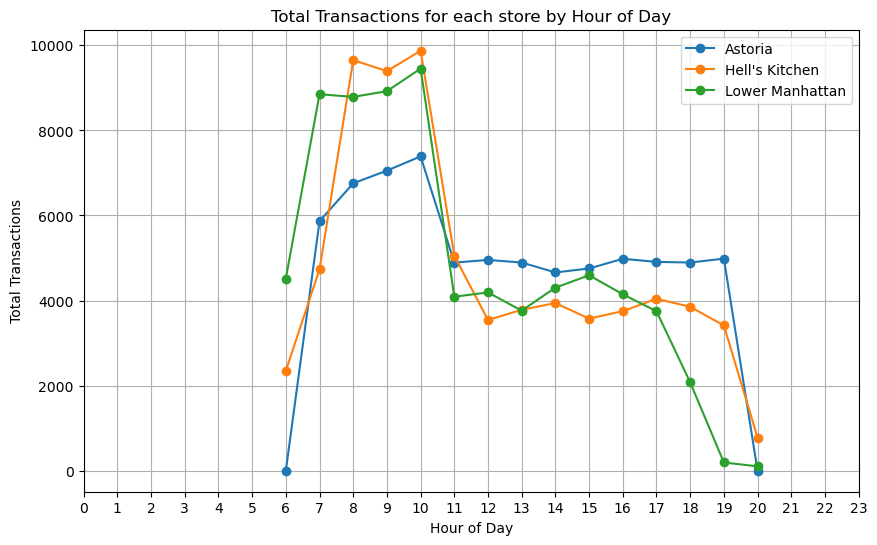

<Figure size 640x480 with 0 Axes>

In [83]:
# Group by Hour and store_location, and sum the transaction_qty
grouped_df = df.groupby(['Hour', 'store_location'])['transaction_qty'].sum().unstack().fillna(0)

# Find the max and min transactions for each store
for store in grouped_df.columns:
  max_transactions = grouped_df[store].max()
  min_transactions = grouped_df[store].min()
  max_hour = grouped_df[grouped_df[store] == max_transactions].index[0]
  min_hour = grouped_df[grouped_df[store] == min_transactions].index[0]
  print(f"Store: {store}")
  print(f" Maximum transactions: {max_transactions} at hour {max_hour}")
  print(f" Minimum transactions: {min_transactions} at hour {min_hour}")

# Plotting line chart
plt.figure(figsize=(10, 6))
for store in grouped_df.columns:
  plt.plot(grouped_df.index, grouped_df[store], marker='o', label = store)
plt.xlabel('Hour of Day')
plt.ylabel('Total Transactions')
plt.title('Total Transactions for each store by Hour of Day')
plt.xticks(range(0, 24))  # Ensure all hours are shown on the x-axis
plt.grid(True)
plt.legend()
plt.show()
plt.clf()

# plot scatter plot of transactions of 24 hour period for each store

This evaluation had unexpected results.  I was expecting there to be the highest amount of sales in the morning, for the morning commute.  However the peak sales for all store locations was 10 am.  The afternoon times were relatively constant then into evening it begins to drop off.  The output above shows when the peak time for sales is occuring for each store location. An interesting data point is that while **Lower Manhattan** has the highest amount of total transactions, at the peak time ** Hell's Kitchen** is selling more during that 2 hour period.

The next evaluation is to see what the highest and lowest selling products are for each store location.  Then I want to plot the top three products and how the sales compare of each between the store locations.

Store: Astoria
 Highest selling product: Brewed Chai tea with 9306 transactions
 Lowest selling product: Green beans with 40 transactions
Store: Hell's Kitchen
 Highest selling product: Barista Espresso with 9064 transactions
 Lowest selling product: Clothing with 24 transactions
Store: Lower Manhattan
 Highest selling product: Gourmet brewed coffee with 8563 transactions
 Lowest selling product: Green beans with 35 transactions


/tmp/ipykernel_1411611/3085973357.py:14: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_products = grouped_data_products.groupby('store_location').apply(lambda x: x.nlargest(3, 'transaction_qty')).reset_index(drop = True)


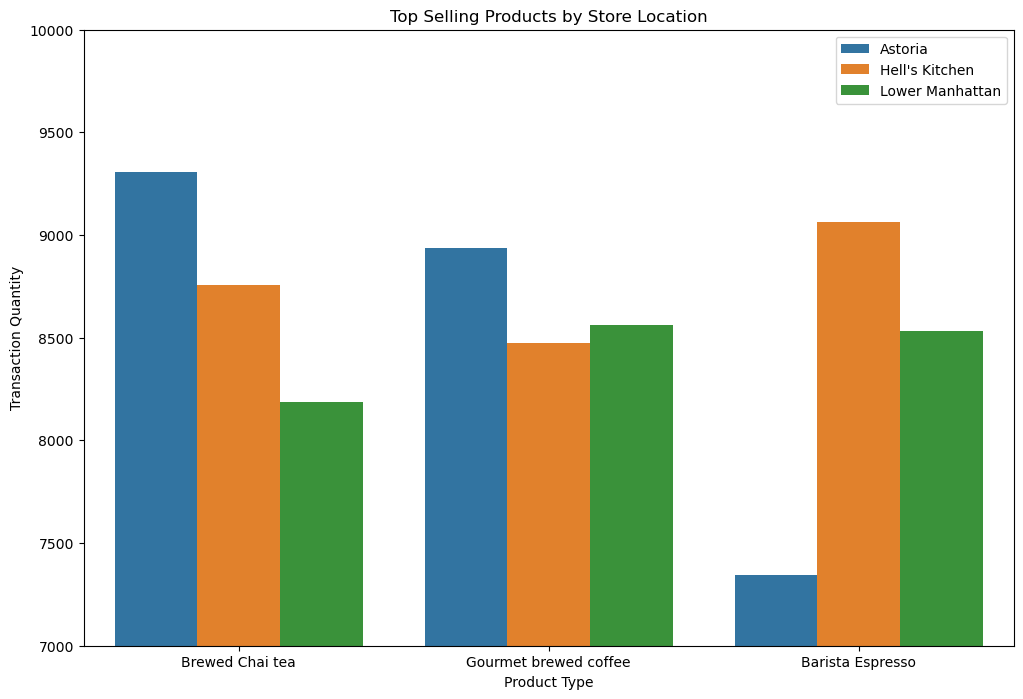

<Figure size 640x480 with 0 Axes>

In [90]:
# group by store location and product type, then sum the transaction pty
grouped_data_products = df.groupby(['store_location', 'product_type'])['transaction_qty'].sum().reset_index()

# find the highest and lowest selling products for each store
for store in grouped_data_products['store_location'].unique():
  store_df = grouped_data_products[grouped_data_products['store_location'] == store]
  max_product = store_df[store_df['transaction_qty'] == store_df['transaction_qty'].max()]
  min_product = store_df[store_df['transaction_qty'] == store_df['transaction_qty'].min()]
  print(f"Store: {store}")
  print(f" Highest selling product: {max_product['product_type'].values[0]} with {max_product['transaction_qty'].values[0]} transactions")
  print(f" Lowest selling product: {min_product['product_type'].values[0]} with {min_product['transaction_qty'].values[0]} transactions")

# find the top three selling products for each store
top_products = grouped_data_products.groupby('store_location').apply(lambda x: x.nlargest(3, 'transaction_qty')).reset_index(drop = True)

# plot the data in a bar chart
plt.figure(figsize = (12, 8))
sns.barplot(data=top_products, x='product_type', y='transaction_qty', hue='store_location')
plt.ylim(7000, 10000)
plt.xlabel('Product Type')
plt.ylabel('Transaction Quantity')
plt.title('Top Selling Products by Store Location')
plt.legend()
plt.show()
plt.clf()

The output above shows the highest and lowest products and how the top three products compare between the three store locations.  Below is the results that corroborate the chart above.

**Store: Astoria**\
 Highest selling product: Brewed Chai tea with 9306 transactions\
 Lowest selling product: Green beans with 40 transactions\

**Store: Hell's Kitchen**\
 Highest selling product: Barista Espresso with 9064 transactions\
 Lowest selling product: Clothing with 24 transactions\

**Store: Lower Manhattan**\
 Highest selling product: Gourmet brewed coffee with 8563 transactions\
 Lowest selling product: Green beans with 35 transactions\

The final analysis is to determine if there is more sales of hot beverages during the winter months.

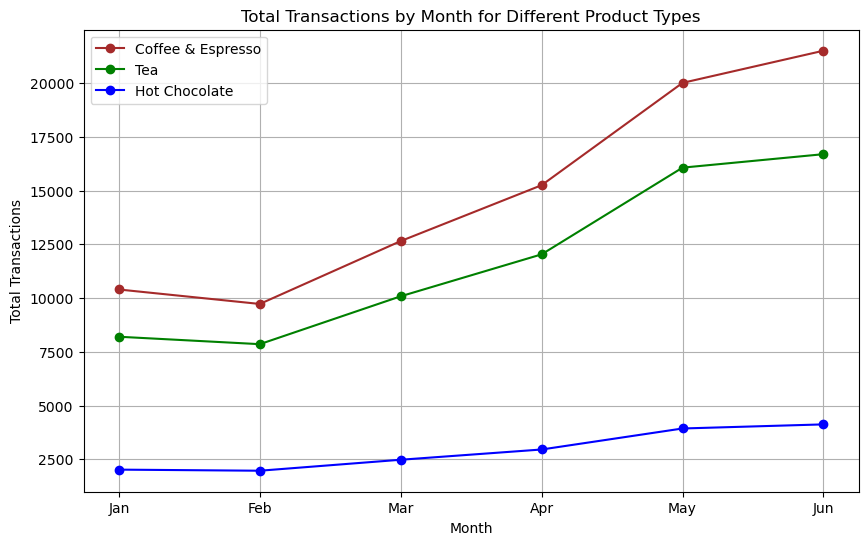

<Figure size 640x480 with 0 Axes>

In [106]:
# Filter the DataFrame for product types containing the words "coffee" or "espresso"
coffee_df = df[df['product_type'].str.contains('coffee|espresso', case=False, na=False)]

# Filter the DataFrame for product types containing the word "tea"
tea_df = df[df['product_type'].str.contains('tea', case=False, na=False)]

# Filter the DataFrame for product types containing the words "hot chocolate"
hot_chocolate_df = df[df['product_type'].str.contains('hot chocolate', case=False, na=False)]

# Group by Month and sum the transaction_qty
monthly_coffee_transactions = coffee_df.groupby('Month')['transaction_qty'].sum().reset_index()
monthly_tea_transactions = tea_df.groupby('Month')['transaction_qty'].sum().reset_index()
monthly_hot_chocolate_transactions = hot_chocolate_df.groupby('Month')['transaction_qty'].sum().reset_index()

# Plot the data on a line plot
month_labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun']

plt.figure(figsize=(10, 6))
plt.plot(monthly_coffee_transactions['Month'], monthly_coffee_transactions['transaction_qty'], marker='o', color='brown', label='Coffee & Espresso')
plt.plot(monthly_tea_transactions['Month'], monthly_tea_transactions['transaction_qty'], marker='o', color='green', label='Tea')
plt.plot(monthly_hot_chocolate_transactions['Month'], monthly_hot_chocolate_transactions['transaction_qty'], marker='o', color='blue', label='Hot Chocolate')
plt.xlabel('Month')
plt.ylabel('Total Transactions')
plt.title('Total Transactions by Month for Different Product Types')
plt.legend(loc='upper left')
ax = plt.subplot()
ax.set_xticks(range(1, 7))
ax.set_xticklabels(month_labels)
plt.grid(True)
plt.show()
plt.clf()


The results are interesting.  However, they are inconclusive since the data is only for the first six (6) months of the year, January through June.  That being said, I grouped the data into three (3) sets: **Coffee (which is coffee and espresso)**, **Tea**, and **Hot Chocolate**. The plot above shows that coffee sales are the highest, followed by tea, and last is hot coffee.  What was interesting is that sales go up through spring and into summer months, with June as the peak.

## Conclusions

In conclusion I was able to determine answers to the five questions I posed at the beginning of the analysis.  I determined that time of day does play a factor into the number of sales for a location, as well as location playing a factor in the total number of sales.  An interesting data point was for the three locations, the top three grossing products are the same for each.  They are Brewed Chai Tea, Barista Espresso, and Gourmet Brewed Coffee not in that order.  Each of these beverages is the leading product for each of stores, and the other two products are the #2 and #3 product for each store.  The most interesting data point is that June sales grossed significantly more than January sales.  This could be due to a number of contributing factors.  If I were to hypothosize, weather plays a huge factor.  The logical argument would be that colder weather would lead to an increase in hot beverage sales.  However, I feel that with warmer weather people tend to be outdoors more, and more willing to walk to a coffee shop and order a beverage.  The time of day for the peak sales also contributes to this.  The peak at 10 am, could be due to people requiring more caffine late in the mornining due to later nights, again due to the weather.

Further analysis, it would be interesting as I mentioned before, that corralating weather data for NYC for the same time period, and business relative location data against this data may lead to more defined answers in the trends noted with regards to total number of sales per location and sales by month.

## Acknowledgements

The data set was provided by Kaggle.com and maintained by Ahmed Mohamed Ibrahim Mohamed.